## Customer Segmentation

Further details and explanation were provided along the code.

In [19]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [20]:
df = pd.read_csv("Dataset/Mall_Customers.csv")

# Printing first 5 records of the data frame
df.head()

# Checking for the count of rows and columns
df.shape

# Figuring out the datatypes on the columns
df.info()

# Confirming that there aren't null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Determining Outliers

An outlier is a data point that is significantly different from the other data points. It may cause severe statistical problems during the analysis.
<br> Hence it is <b>required</b> to clean the data if such thing exists.

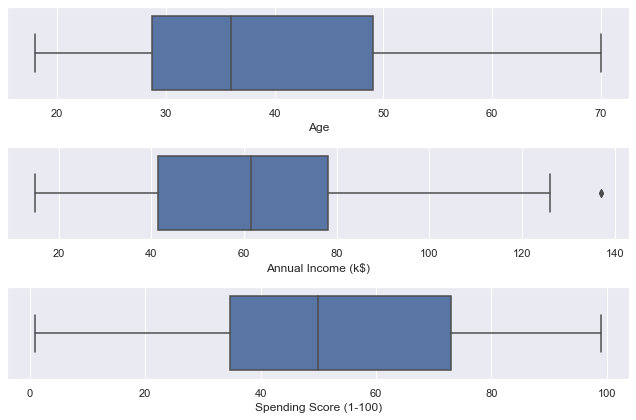

In [21]:
# Plotting box plots to check for outliers

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (9,6))
sns.boxplot(ax = ax[0], x = 'Age', data = df)
sns.boxplot(ax = ax[1], x = 'Annual Income (k$)', data = df)
sns.boxplot(ax = ax[2], x = 'Spending Score (1-100)', data = df)
fig.tight_layout()

<b>Observation</b> 
<br><br>
A dot represents the outliers, which we only found in the "Annual Income"'s box plot. Since, the number of outliers is insignificant, the analysis will preceed as is.

In [22]:
# Statistical information

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Counting Gender Ratio by Visits

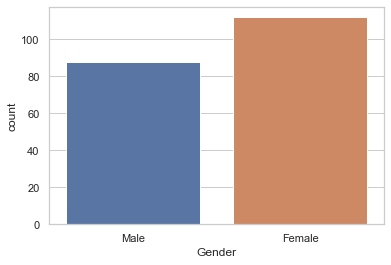

In [23]:
sns.set_theme(style = "whitegrid")
ax1 = sns.countplot(x = 'Gender', data = df)

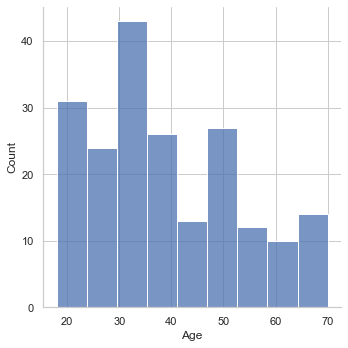

In [24]:
# PDF of Age

ax3 = sns.displot(df['Age'])

### Finding the correlation between the customer's annual income with their spending score

Only 2 columns have been selected to train the model. Choosing all 5 columns, will make it difficult to visualize a 5-D plot. 
<br> However, by selecting only 2 columns, the plot of 2-D plot will be less overwhelming while visualizing it effectively.
<br><br> On a side note, it possible to use dimensionality reduction techniques such as PCA to choose and visualize all 5 columns.

In [25]:
X = df.iloc[:,3:5].values
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

### Identifying the number of clusters using elbow graph

<br><br> To determine the right k-size for the algorithm, "Elbow method" will be used.

<br>Elbow method is one of the most popular methods to select the optimum value of K for the model.

<br> It works by calculating the <b>Within-Cluster-Sum of Squarred Erros (WSS) </b> for different values of k, and it chooses the value of k for which the WSS is insignificant the most.

<br> In other words:

<br> 1. The squared error for each point is the square of the distance between the point and the predicted cluster center.
<br> 2. Any distance metric such as the Euclidean distance or Hamming distance can be used.
<br> 3. The WSS score is the sum of these squared errors for all data points.
<br> 4. The point where there is a significant drop in WSS score is selected to be the value of k.



In [26]:
# Computing WSS scored for k values 1 - 10

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

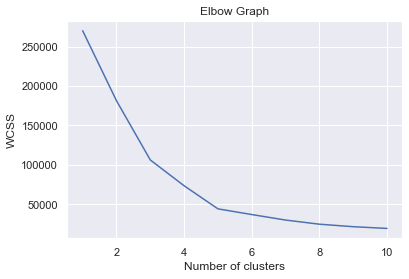

In [27]:
# Using the Elbow method

sns.set()
plt.plot(range(1,11), wcss)
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

<b>Observation</b>

From the elbow graph, the number of clusters = 5. 
Hence we can choose the value of k to be 5

Trainning the model

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 7)
Y = kmeans.fit_predict(X)

# The k-means model is initialized with n_clusters = 5 
# (Number of clusters ), k-means++ was used for init. 
# k-means++ ensures a smarter initializing of the centroids,
# and improves the quality of clustering. 
# Random_state is used to set the seed for the random generator
# so that the results can be reproduced.

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

Text(0, 0.5, 'Spending Score')

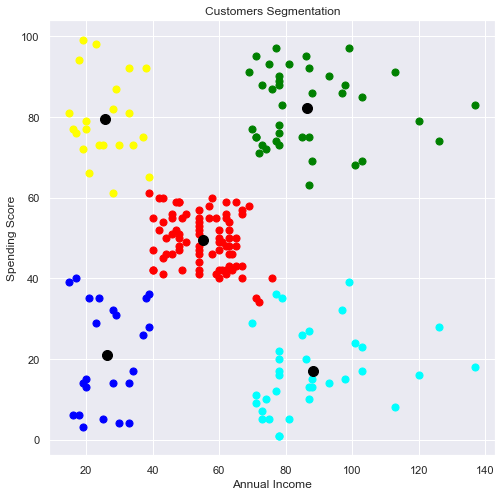

In [ ]:
# Scatter plot to visualize the different cluster in the dataset

plt.figure(figsize = (8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s = 50, c = 'green', label = 'cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s = 50, c = 'blue', label = 'cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s = 50, c = 'red', label = 'cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s = 50, c = 'yellow', label = 'cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s = 50, c = 'cyan', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = "Centroids")

plt.title("Customers Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

<b>Observation</b>

The scatter plot shows that the data points are divided into 5 distinct clusters.
The <b>cyan cluster</b> earns an annual income in the range of 0 to 40K $. Their spending score is low. Hence they become potential opportunities for the mall and can be targeted by giving special discounts.
The <b>yellow cluster</b>, too, earns the same annual income as the cyan group. However, their spending score is high. So they can be thought of like the ideal group.
The <b>green cluster</b> earns a high annual income, but their spending scores are low. This suggests that they visit the mall but do not spend the money to buy anything. They are also potential opportunities for the mall to target, however, these kind of customers
can be considered the post opinionated about marketing and the pricing approach. This cluster, is important to cater to, because if they are convinced by the product, they would be the main cluster than retracts more customers, whether through a mouth-to-mouth marketing, or advertising us on their own social media. Also, it suggested their proficency, so it's most likely that they'll be trusted when they share their own opinion on a certain benefit, they benefited from at the mall.
The <b>red cluster</b> earns a high annual income, and they also have a high spending score. The mall must ensure that their interests are met as time passes on.